## Find the best binary classifier for a given dataset
### Imports

In [1]:
# Libraries
import pandas as pd
import numpy as np
import sklearn.datasets as data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from MachineLearning.SupervisedLearning.LogisticRegression.Classification.functions import *
from MachineLearning.SupervisedLearning.Ridge.Classification.functions import *
from MachineLearning.SupervisedLearning.NaiveBayes.Classification.functions import *
from MachineLearning.SupervisedLearning.NearestNeighbors.Classification.functions import *
from MachineLearning.SupervisedLearning.SVM.Classification.functions import *
from MachineLearning.SupervisedLearning.DecisionTree.Classification.functions import *
from MachineLearning.SupervisedLearning.LinearDiscriminantAnalysis.Classification.functions import *
from MachineLearning.SupervisedLearning.QuadraticDiscriminantAnalysis.Classification.functions import *

# Silence convergence warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)



### Load dataset

In [37]:
df = pd.read_csv("Data/BinaryClassification/heart_attack_prediction/data.csv")
X = df.drop("output", axis=1)
y = df["output"]


In [38]:


# X, y = data.load_breast_cancer(return_X_y=True)

# Limit to two features
# X = X[:,:2]

# Create train/test splits (train_test_split() automatically uses a stratified split based on class labels)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

### Visualize high-dimensional data using t-SNE

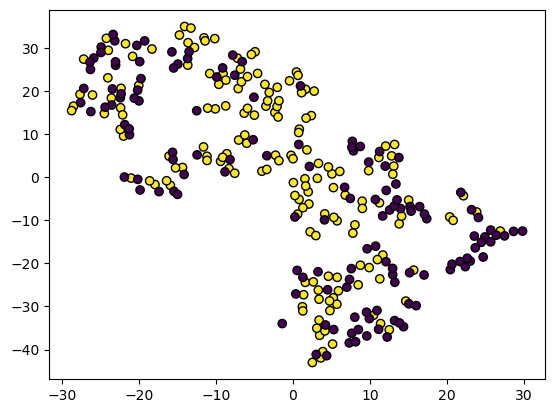

In [39]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=15).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, edgecolor="k")


### Specify metrics
Specify which metrics to judge the algorithm performance on. Options:
- **Accuracy:**
- **Precision:**
- **Recall:**
- **F1:**

In [23]:
scoring = "accuracy"  # TODO: Add possibility of selecting multiple scoring functions

### Set hyperparameter ranges

In [24]:
ridge_parameters = {
    "alpha" : [0.01, 0.1, 1, 10, 100]
}

logistic_regression_parameters = {
    "C_range" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

naive_bayes_parameters = {
    "var_smoothing" : [0.000000001, 0.00000001]
}

knn_parameters = {
    "k_range": [i for i in range(1, 20, 2)]
}

SVM_parameters = {
    "kernels" : ["linear", "poly", "rbf", "sigmoid"],
    "C_range": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

decision_tree_parameters = {
    "criterion" : ["gini", "entropy", "log_loss"],
}

LDA_parameters = {
    "solver" : ["svd", "lsqr", "eigen"],
}

QDA_parameters = {
    "reg_param" : [0.0,],
}



### Run algorithms /w 10-fold cross-validation

In [25]:
# Run ridge
ridge_results, ridge_best_estimator, ridge_best_score = ridge_gridsearch(
    X_train, y_train, ridge_parameters, scoring=scoring)

# Run logistic regression
logistic_regression_results, logistic_regression_best_estimator, logistic_regression_best_score \
    = logistic_regression_gridsearch(X_train, y_train, logistic_regression_parameters, scoring=scoring)

# Run Naive Bayes
naive_bayes_results, naive_bayes_best_estimator, naive_bayes_best_score = naive_bayes_gridsearch(
    X_train, y_train, naive_bayes_parameters, scoring=scoring)

# Run k-NN
knn_results, knn_best_estimator, knn_best_score = knn_gridsearch(
    X_train, y_train, knn_parameters, scoring=scoring)

# # Run SVM
SVM_results, SVM_best_estimator, SVM_best_score = SVM_gridsearch(
    X_train, y_train, SVM_parameters, scoring=scoring)

# Run decision tree
decision_tree_results, decision_tree_best_estimator, decision_tree_best_score = decision_tree_gridsearch(
    X_train, y_train, decision_tree_parameters, scoring=scoring)

# Run LDA
LDA_results, LDA_best_estimator, LDA_best_score = LDA_gridsearch(
    X_train, y_train, LDA_parameters, scoring=scoring)

# Run QDA
QDA_results, QDA_best_estimator, QDA_best_score = QDA_gridsearch(
    X_train, y_train, QDA_parameters, scoring=scoring)





### Assemble results

In [26]:
all_results = {
    "ridge": pd.DataFrame(ridge_results),
    "logistic_regression": pd.DataFrame(logistic_regression_results),
    "naive_bayes": pd.DataFrame(naive_bayes_results),
    "nearest_neighbors": pd.DataFrame(knn_results),
    "SVM": pd.DataFrame(SVM_results),
    "decision_tree": pd.DataFrame(decision_tree_results),
    "LDA": pd.DataFrame(LDA_results),
    "QDA": pd.DataFrame(QDA_results),
}

best_results = [
    [ridge_best_estimator, ridge_best_score],
    [logistic_regression_best_estimator, logistic_regression_best_score],
    [naive_bayes_best_estimator, naive_bayes_best_score],
    [knn_best_estimator,knn_best_score],
    [SVM_best_estimator,SVM_best_score],
    [decision_tree_best_estimator,decision_tree_best_score],
    [LDA_best_estimator,LDA_best_score],
    [QDA_best_estimator, QDA_best_score],
]



In [27]:
split_columns = [f"split{i}_train_score" for i in range(10)]
split_columns.extend([f"split{i}_test_score" for i in range(10)])
all_results["decision_tree"].drop(split_columns, axis=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.0027,0.000459,0.001300,0.000458,gini,{'criterion': 'gini'},0.719000,0.071376,3,1.0,0.0
1,0.0025,0.000500,0.001301,0.000459,entropy,{'criterion': 'entropy'},0.727167,0.083928,1,1.0,0.0
2,0.0029,0.000539,0.001100,0.000299,log_loss,{'criterion': 'log_loss'},0.727167,0.083928,1,1.0,0.0


### Obtain best validation score per algorithm

In [28]:
df_best_results = pd.DataFrame(best_results, columns = ["Estimator", "Validation_Score"])
df_best_results


,Estimator,Validation_Score
0,RidgeClassifier(alpha=100),0.797833
1,LogisticRegression(C=0.1),0.822333
2,GaussianNB(),0.793500
3,KNeighborsClassifier(n_neighbors=9),0.657000
4,"SVC(C=1, kernel='linear')",0.822667
5,"DecisionTreeClassifier(criterion='entropy', ra...",0.727167
6,LinearDiscriminantAnalysis(),0.789500
7,QuadraticDiscriminantAnalysis(),0.764500


### Compare performance ON TEST DATA using ROC curves

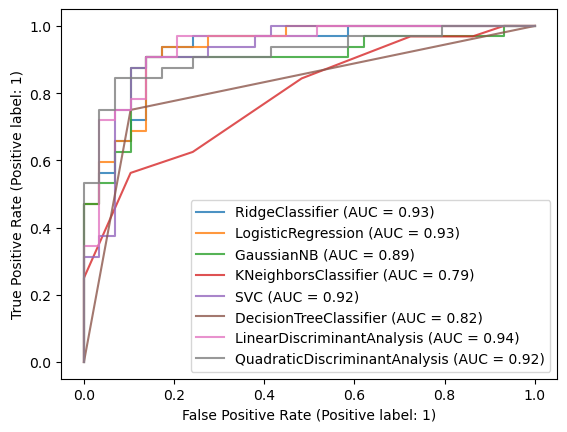

In [29]:
from sklearn.metrics import RocCurveDisplay

ROC_plot = plt.plot()

bestimators = [e[0] for e in best_results]

for estimator in bestimators:
    ax = plt.gca()
    _disp = RocCurveDisplay.from_estimator(estimator, X_test, y_test, ax=ax, alpha=0.8)
    # ROC_plot.plot(ax=ax, alpha=0.8)
